In [94]:
import pandas as pd
from nltk import tokenize
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [109]:
file_path = '/content/drive/MyDrive/krishna/WIL/Task 12/christmas_recipes.csv'

In [110]:
# Read csv file into a DataFrame
recipe_df = pd.read_csv(file_path)

In [58]:
recipe_df.head()

,Title,Time,Servings,Ingredients,Instructions,Image
0,Perfect roast turkey,180,10 serving(s),"['20ml/¾fl oz rapeseed oil', '1 x 5kg/11lb goo...",Remove the turkey from the fridge and bring to...,https://ichef.bbci.co.uk/food/ic/food_16x9_832...
1,Stuffed roast turkey breast,180,8 serving(s),"['1 tbsp sunflower oil', '1 onion, finely chop...","To make the stuffing, heat the oil and gently ...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
2,Nigella's turkey breast with Christmas stuffing,150,12 serving(s),"['100g/3½oz dried cranberries', '100ml/3½fl oz...",Put the cranberries and Marsala into a small s...,https://ichef.bbci.co.uk/food/ic/food_16x9_832...
3,Gordon Ramsay's roast turkey crown,120,8 serving(s),"['125g/4½oz pack unsalted butter, softened', '...",Pre-heat the oven to 200C/180C Fan/Gas 6.\nFor...,https://ichef.bbci.co.uk/food/ic/food_16x9_832...
4,Roast turkey crown,180,8 serving(s),"['1 turkey breast crown (a wingless, legless t...",Preheat the oven to 220C/200C Fan/Gas 7.\nRub ...,https://ichef.bbci.co.uk/food/ic/food_16x9_832...


In [25]:
recipe_df.isnull().sum()

Title           0
Time            0
Servings        0
Ingredients     0
Instructions    0
Image           0
dtype: int64

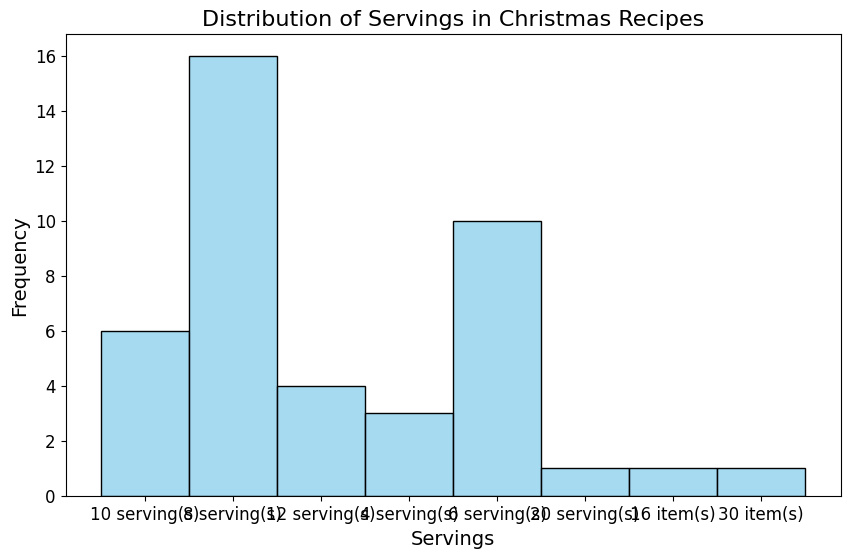

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=recipe_df, x='Servings', bins=20, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Servings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Servings in Christmas Recipes', fontsize=16)
plt.tick_params(axis='both', labelsize=12)

plt.show()

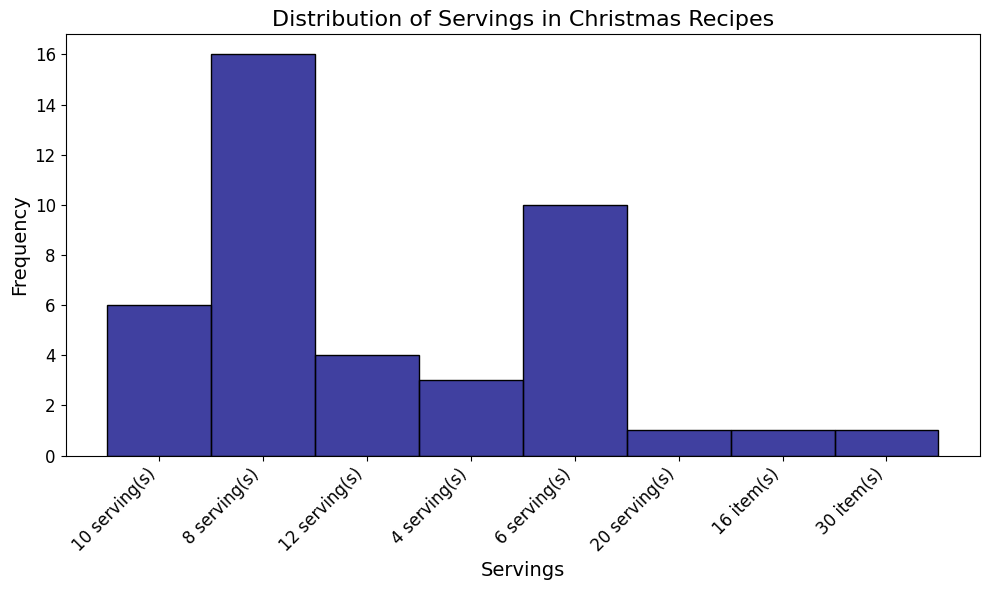

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=recipe_df, x='Servings', bins=20, kde=False, color='navy', edgecolor='black')
plt.xlabel('Servings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Servings in Christmas Recipes', fontsize=16)
plt.tick_params(axis='both', labelsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Ensures that all elements fit within the figure area
plt.show()

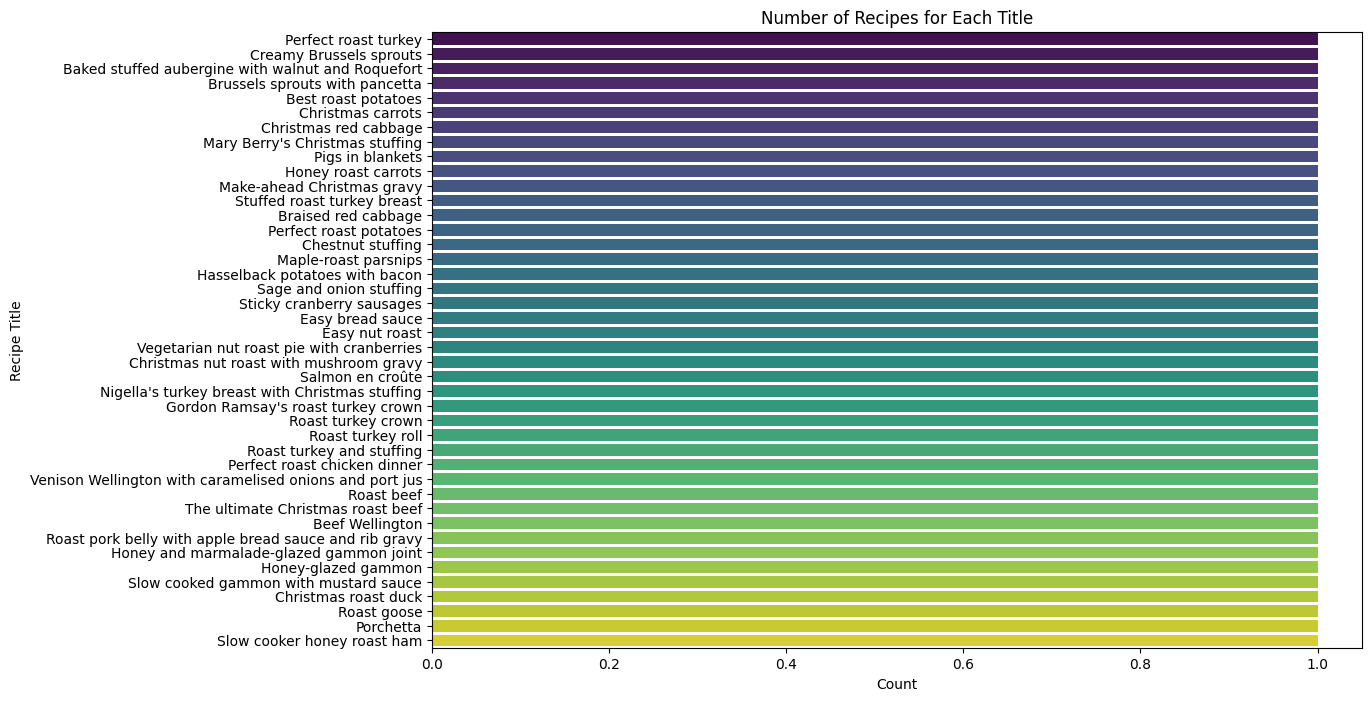

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(data=recipe_df, y='Title', palette='viridis', order=recipe_df['Title'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Recipe Title')
plt.title('Number of Recipes for Each Title')
plt.show()

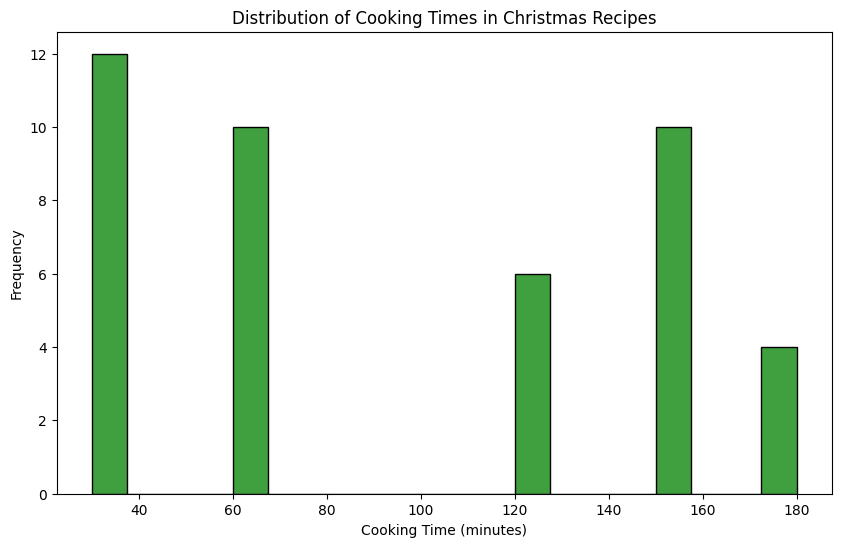

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=recipe_df, x='Time', bins=20, kde=False, color='green', edgecolor='black')
plt.xlabel('Cooking Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Cooking Times in Christmas Recipes')
plt.show()

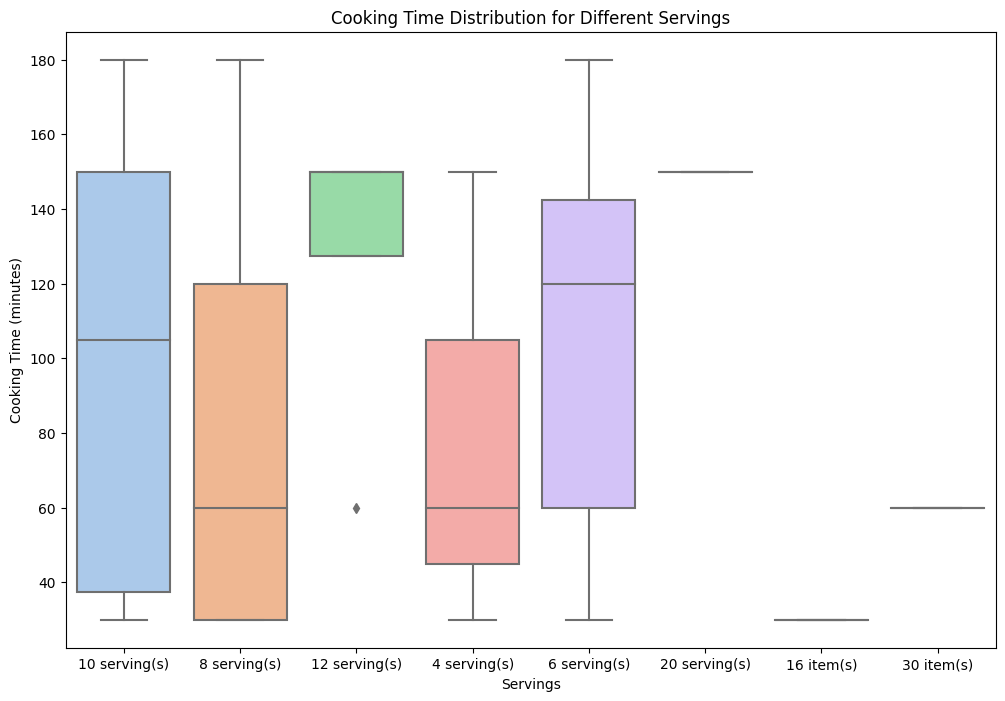

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=recipe_df, x='Servings', y='Time', palette='pastel')
plt.xlabel('Servings')
plt.ylabel('Cooking Time (minutes)')
plt.title('Cooking Time Distribution for Different Servings')
plt.show()

##Recommendation System

In [119]:
# Data Cleaning
recipe_df['Servings'] = recipe_df['Servings'].str.extract('(\d+)').astype(float)

In [121]:
# Text Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', token_pattern=r'[^\s,]+')
tfidf_matrix = tfidf_vectorizer.fit_transform(recipe_df['Ingredients'].apply(lambda x: ' '.join(x)))

In [122]:
# Compute the Cosine Similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [123]:
# Function to get recipe recommendations
def get_recommendations(recipe_name, cosine_sim=cosine_sim):
    recipe_name = recipe_name.strip().lower()
    recipe_df['Title'] = recipe_df['Title'].astype(str).str.strip().str.lower()

    idx = recipe_df.index[recipe_df['Title'] == recipe_name].tolist()

    if not idx:
        print(f"Recipe '{recipe_name}' not found in the dataset.")
        return []

    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    recipe_indices = [i[0] for i in sim_scores]
    return recipe_df['Title'].iloc[recipe_indices]

In [124]:
# Get recommendations for a specific recipe
recipe_to_recommend = "Perfect roast turkey"
recommendations = get_recommendations(recipe_to_recommend)

In [126]:
if not recommendations.empty:
    print(f"Recipes similar to '{recipe_to_recommend}':")
    print(recommendations)
else:
    print(f"No similar recipes found for '{recipe_to_recommend}'.")

Recipes similar to 'Perfect roast turkey':
22                 easy nut roast
17                    roast goose
1     stuffed roast turkey breast
32     make-ahead christmas gravy
16           christmas roast duck
Name: Title, dtype: object
